In [8]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
 import pandas as pd
shared_drive_path = '/content/drive/Shareddrives/analitica/datos_proyecto.xlsx'

#Caso 1:

In [ ]:
df_esis = pd.read_excel(shared_drive_path, sheet_name='ESIS')
header_row = df_esis.iloc[2]
data_row = df_esis.iloc[3]

df_processed = pd.DataFrame([data_row.values], columns=header_row.values)
df_processed

,Año,2016.0,2017.0,2018.0,2019.0,2020.0,2021,2022.0,2023,2024,2025
0,Cantidad de ingresantes:,24.0,12.0,17.0,19.0,31.0,47,46.0,28,12,12


In [ ]:
df_esis = df_processed.T
df_esis.columns = df_esis.iloc[0]
df_esis = df_esis[1:]
df_esis = df_esis.apply(lambda x: x.astype(int))
df_esis.index = df_esis.index.astype(int)
df_esis

Año,Cantidad de ingresantes:
2016,24
2017,12
2018,17
2019,19
2020,31
2021,47
2022,46
2023,28
2024,12
2025,12


In [ ]:
moda = df_esis['Cantidad de ingresantes:'].mode()
media = df_esis['Cantidad de ingresantes:'].mean()
mediana = df_esis['Cantidad de ingresantes:'].median()

print(f"Moda: {moda}")
print(f"Media: {media}")
print(f"Mediana: {mediana}")

Moda: 0    12
Name: Cantidad de ingresantes:, dtype: int64
Media: 24.8
Mediana: 21.5


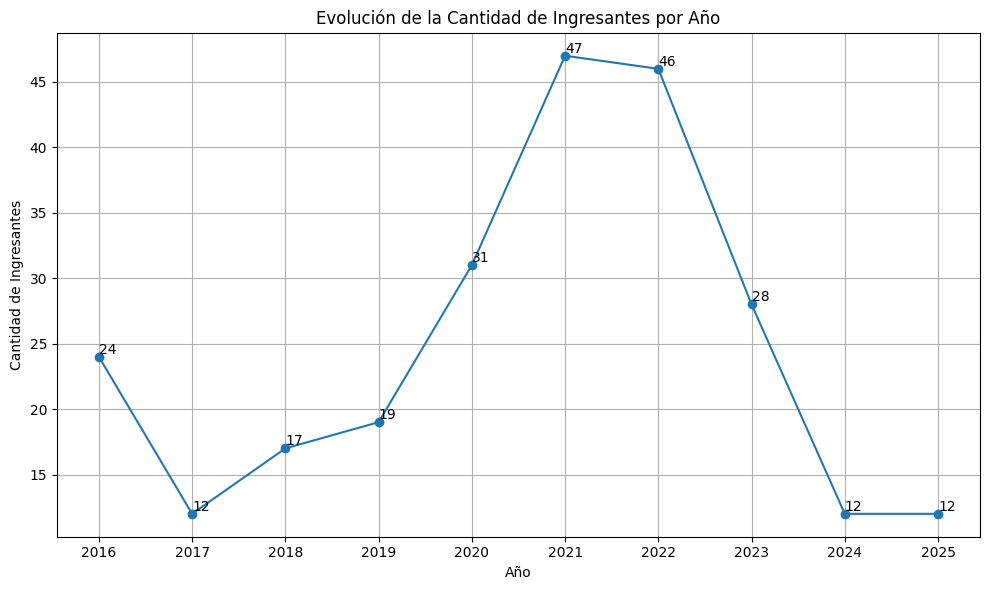

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Asegura de que la columna y el índice sean numéricos
df_esis.index = pd.to_numeric(df_esis.index)
df_esis['Cantidad de ingresantes:'] = pd.to_numeric(df_esis['Cantidad de ingresantes:'])

plt.figure(figsize=(10, 6))
plt.plot(df_esis.index, df_esis['Cantidad de ingresantes:'], marker='o', linestyle='-')
plt.title('Evolución de la Cantidad de Ingresantes por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad de Ingresantes')
plt.grid(True)
plt.xticks(df_esis.index) # Asegura que se muestren todos los años como ticks
plt.tight_layout()
for x, y in zip(df_esis.index, df_esis['Cantidad de ingresantes:']): #agrega valores a cada punto
    plt.text(x, y, str(y), ha='left', va='bottom')

plt.show()

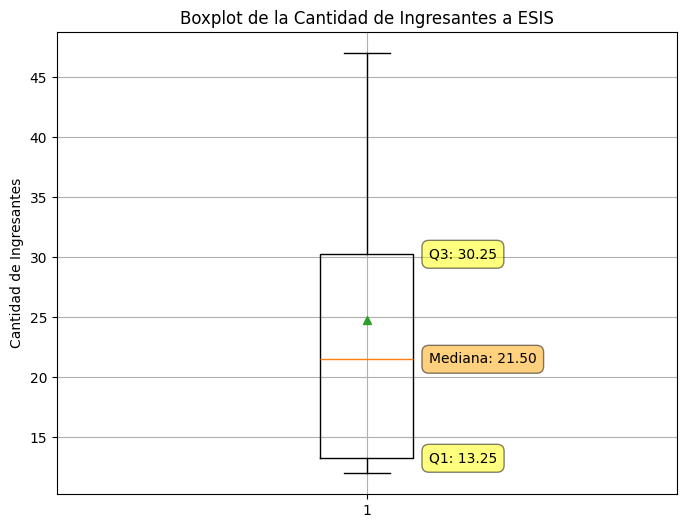

In [ ]:
plt.figure(figsize=(8, 6))
plt.boxplot(df_esis['Cantidad de ingresantes:'], showmeans=True) # showmeans=True muestra la media
plt.title('Boxplot de la Cantidad de Ingresantes a ESIS')
plt.ylabel('Cantidad de Ingresantes')
plt.grid(True)

# Agregar texto para los valores de los cuartiles
q1 = df_esis['Cantidad de ingresantes:'].quantile(0.25)
median_val = df_esis['Cantidad de ingresantes:'].median()
q3 = df_esis['Cantidad de ingresantes:'].quantile(0.75)
plt.text(1.1, q1, f'Q1: {q1:.2f}', va='center', ha='left', bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5))
plt.text(1.1, median_val, f'Mediana: {median_val:.2f}', va='center', ha='left', bbox=dict(boxstyle='round,pad=0.5', fc='orange', alpha=0.5))
plt.text(1.1, q3, f'Q3: {q3:.2f}', va='center', ha='left', bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5))

plt.show()

#Caso 2

In [ ]:
df_2125 = pd.read_excel(shared_drive_path, sheet_name='21_25')
df_21 = df_2125.iloc[4:, 0:6]
df_21.columns = df_21.iloc[0]
df_21 = df_21[1:]
df_21 = df_21.reset_index(drop=True)

df_21

4,Puesto,ESIS,ESME,ESMC,ESMI,ESIQ
0,1,400,366.25,366.25,400,366.25
1,2,388.75,303.75,366.25,388.75,271.25
2,3,388.75,298.75,343.75,377.5,231.25
3,4,388.75,265,343.75,377.5,197.5
4,5,377.5,247.5,343.75,377.5,186.25
...,...,...,...,...,...,...
296,297,NSP,NaN,NaN,NaN,NaN
297,298,NSP,NaN,NaN,NaN,NaN
298,299,NSP,NaN,NaN,NaN,NaN
299,300,NSP,NaN,NaN,NaN,NaN


In [ ]:
df_25 = df_2125.iloc[4:, 7:13]
df_25.columns = df_25.iloc[0]
df_25 = df_25[1:]
df_25 = df_25.reset_index(drop=True)

df_25

4,Puesto,ESIS,ESME,ESMC,ESMI,ESIQ
0,1,424.25,291.00,466.75,395.00,354.00
1,2,406.50,278.25,364.25,364.25,329.25
2,3,406.25,273.25,343.75,354.00,282.25
3,4,386.00,272.00,333.50,344.75,280.50
4,5,384.75,272.00,325.75,343.75,261.75
...,...,...,...,...,...,...
296,NaN,NaN,NaN,NaN,NaN,NaN
297,NaN,NaN,NaN,NaN,NaN,NaN
298,NaN,NaN,NaN,NaN,NaN,NaN
299,NaN,NaN,NaN,NaN,NaN,NaN


***---------Para el 2021***

In [ ]:
for col in df_21.columns[1:]:
    #verifica que los datos sean numericos
    df_21[col] = pd.to_numeric(df_21[col], errors='coerce')
    col_data = df_21[col].dropna() #quita nulos

    if not col_data.empty:
        moda = col_data.mode()
        media = col_data.mean()
        mediana = col_data.median()

        print(f"Estadísticas para la columna: '{col}'")
        print(f"Moda: {moda.tolist()}") #imprime todos si hay mas de 1
        print(f"Media: {media}")
        print(f"Mediana: {mediana}")
        print("-" * 20)
    else:
        print(f"La columna '{col}' no contiene datos numéricos válidos para calcular estadísticas.")
        print("-" * 20)

Estadísticas para la columna: 'ESIS'
Moda: [163.75]
Media: 186.8312937062937
Mediana: 172.5
--------------------
Estadísticas para la columna: 'ESME'
Moda: [107.5]
Media: 134.3664383561644
Mediana: 120.0
--------------------
Estadísticas para la columna: 'ESMC'
Moda: [73.75]
Media: 171.65
Mediana: 165.0
--------------------
Estadísticas para la columna: 'ESMI'
Moda: [152.5, 163.75, 377.5]
Media: 194.91803278688525
Mediana: 163.75
--------------------
Estadísticas para la columna: 'ESIQ'
Moda: [62.5, 107.5, 120.0, 146.25, 163.75, 181.25]
Media: 124.17613636363636
Mediana: 120.0
--------------------


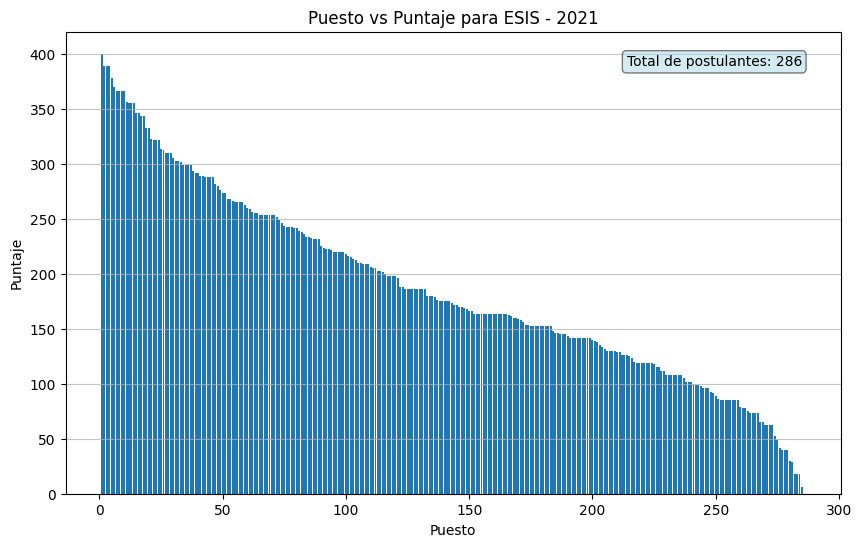

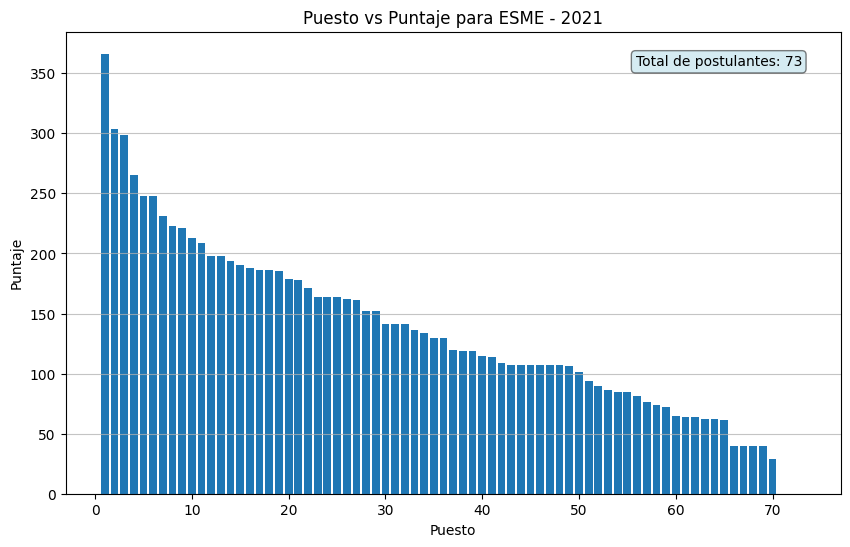

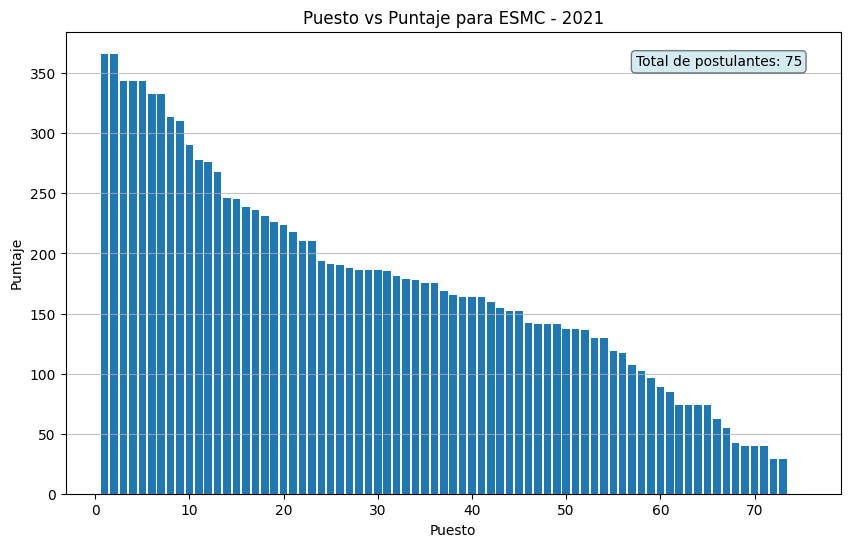

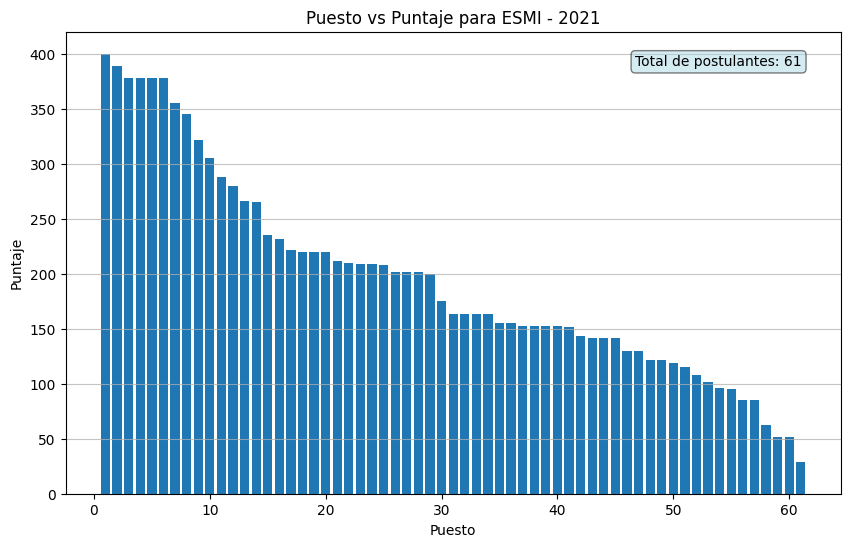

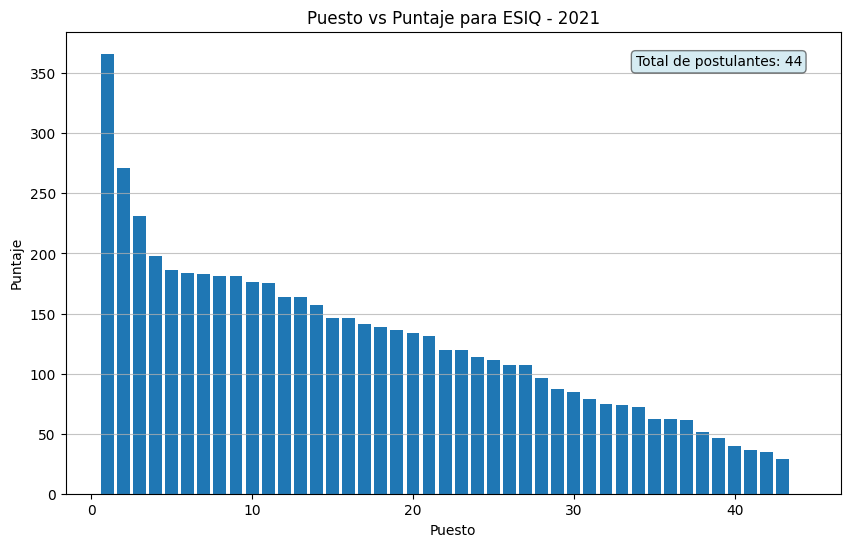

In [ ]:
carreras = ['ESIS', 'ESME', 'ESMC', 'ESMI', 'ESIQ']

for carrera in carreras:
    col_index = df_21.columns.get_loc(carrera)
    df_21[carrera] = pd.to_numeric(df_21[carrera], errors='coerce')
    df_21['Puesto'] = pd.to_numeric(df_21['Puesto'], errors='coerce')

    # Eliminar filas con valores nulos en las columnas 'Puesto' o la columna de la carrera actual
    df_carrera = df_21[['Puesto', carrera]].dropna()

    if not df_carrera.empty:
        plt.figure(figsize=(10, 6))
        plt.bar(df_carrera['Puesto'], df_carrera[carrera])
        plt.title(f'Puesto vs Puntaje para {carrera} - 2021')
        plt.xlabel('Puesto')
        plt.ylabel('Puntaje')
        plt.grid(axis='y', alpha=0.75)
        # Calcular el total de postulantes para esta carrera
        total_puestos = df_carrera['Puesto'].count()
        # Añadir el cuadro de texto con el total de puestos en la esquina superior derecha
        props = dict(boxstyle='round', facecolor='lightblue', alpha=0.5)
        plt.text(0.95, 0.95, f'Total de postulantes: {total_puestos}',
                 transform=plt.gca().transAxes, fontsize=10,
                 verticalalignment='top', horizontalalignment='right', bbox=props)
        plt.show()
    else:
        print(f"No hay datos válidos para graficar para la carrera {carrera}.")

 ***-------- Para el 2025***

In [ ]:
for col in df_25.columns[1:]:
    #verifica que los datos sean numericos
    df_25[col] = pd.to_numeric(df_25[col], errors='coerce')
    col_data = df_25[col].dropna() #quita nulos

    if not col_data.empty:
        moda = col_data.mode()
        media = col_data.mean()
        mediana = col_data.median()

        print(f"Estadísticas para la columna: '{col}'")
        print(f"Moda: {moda.tolist()}") #imprime todos si hay mas de 1
        print(f"Media: {media}")
        print(f"Mediana: {mediana}")
        print("-" * 20)
    else:
        print(f"La columna '{col}' no contiene datos numéricos válidos para calcular estadísticas.")
        print("-" * 20)

Estadísticas para la columna: 'ESIS'
Moda: [190.0, 282.25, 313.0]
Media: 239.87701863354036
Mediana: 242.25
--------------------
Estadísticas para la columna: 'ESME'
Moda: [169.5]
Media: 203.0530612244898
Mediana: 201.0
--------------------
Estadísticas para la columna: 'ESMC'
Moda: [220.75, 231.0]
Media: 234.50632911392404
Mediana: 222.0
--------------------
Estadísticas para la columna: 'ESMI'
Moda: [220.75]
Media: 227.4436936936937
Mediana: 220.75
--------------------
Estadísticas para la columna: 'ESIQ'
Moda: [179.75, 210.5]
Media: 211.33823529411765
Mediana: 205.875
--------------------


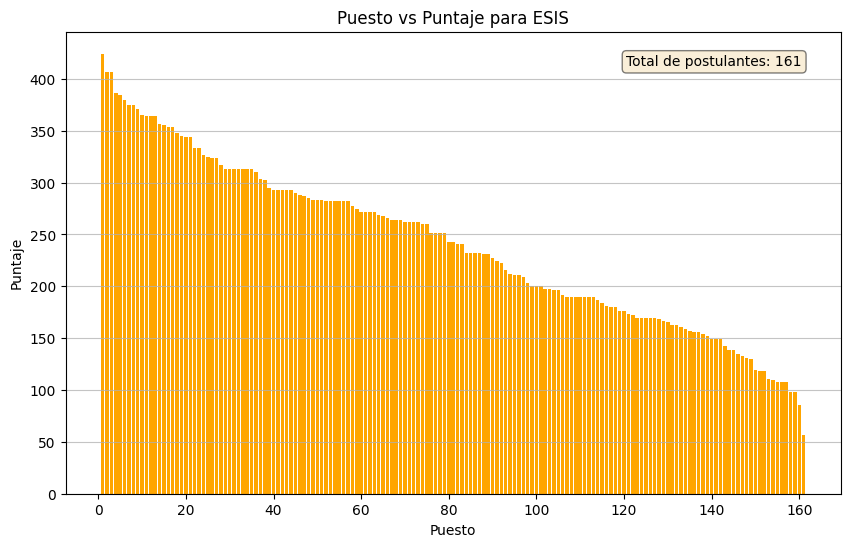

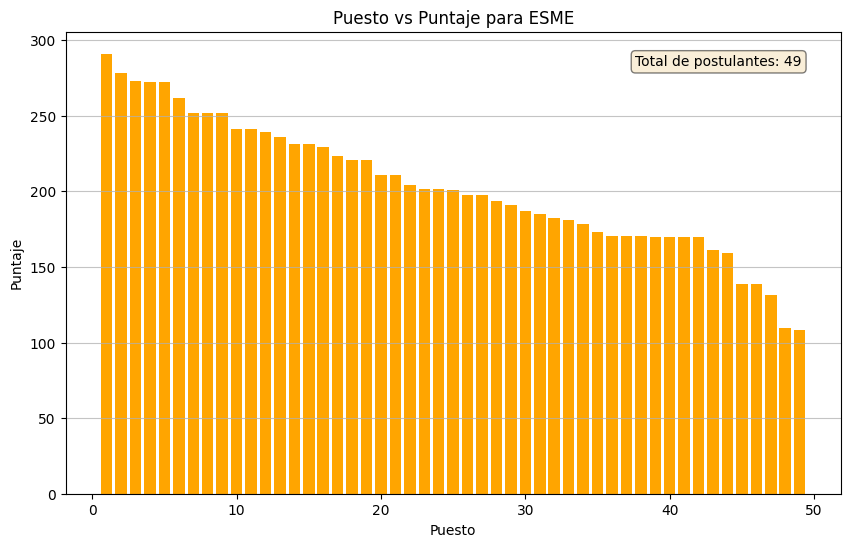

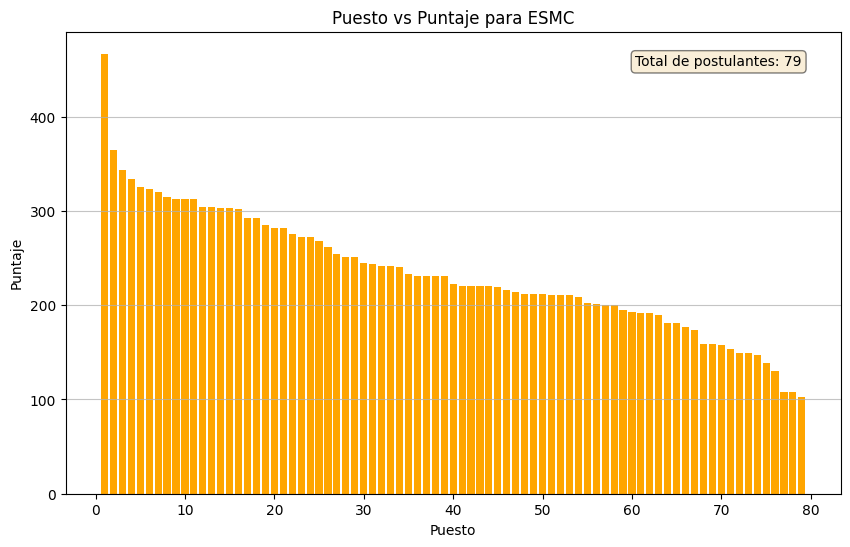

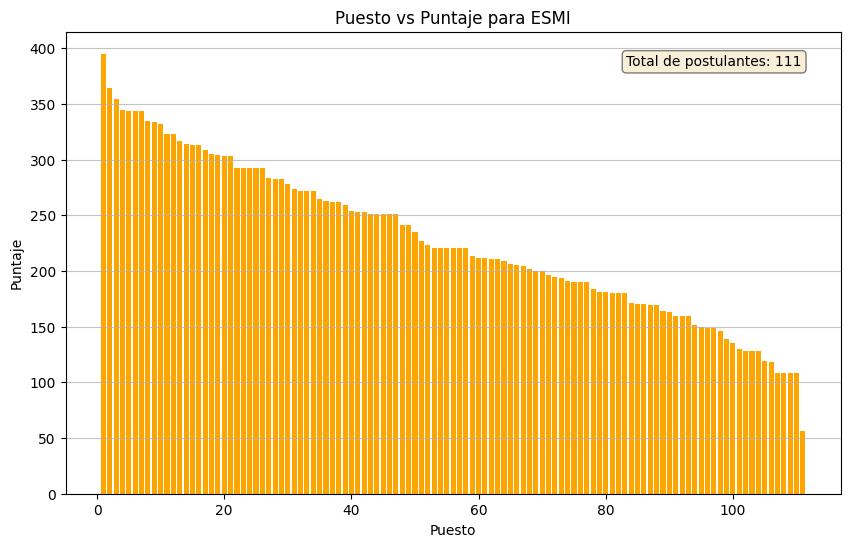

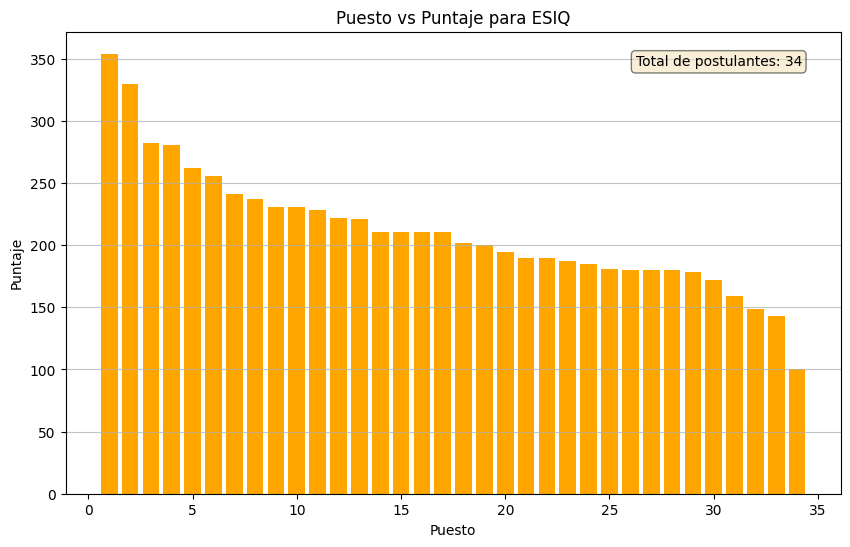

In [ ]:
carreras = ['ESIS', 'ESME', 'ESMC', 'ESMI', 'ESIQ']

for carrera in carreras:
    col_index = df_25.columns.get_loc(carrera)
    df_25[carrera] = pd.to_numeric(df_25[carrera], errors='coerce')
    df_25['Puesto'] = pd.to_numeric(df_25['Puesto'], errors='coerce')

    #Eliminar filas con valores nulos en las columnas 'Puesto' o
    #la columna de la carrera actual
    df_carrera = df_25[['Puesto', carrera]].dropna()
    if not df_carrera.empty:
        plt.figure(figsize=(10, 6))
        bars = plt.bar(df_carrera['Puesto'], df_carrera[carrera], color='orange')
        plt.title(f'Puesto vs Puntaje para {carrera}')
        plt.xlabel('Puesto')
        plt.ylabel('Puntaje')
        plt.grid(axis='y', alpha=0.75)

        # Calcular el total de postulantes para esta carrera
        total_puestos = df_carrera['Puesto'].count()
        # Añadir el cuadro de texto con el total de puestos en la esquina superior derecha
        props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
        plt.text(0.95, 0.95, f'Total de postulantes: {total_puestos}', transform=plt.gca().transAxes,
                 fontsize=10, verticalalignment='top', horizontalalignment='right', bbox=props)

        plt.show()
    else:
        print(f"No hay datos válidos para graficar para la carrera {carrera}.")


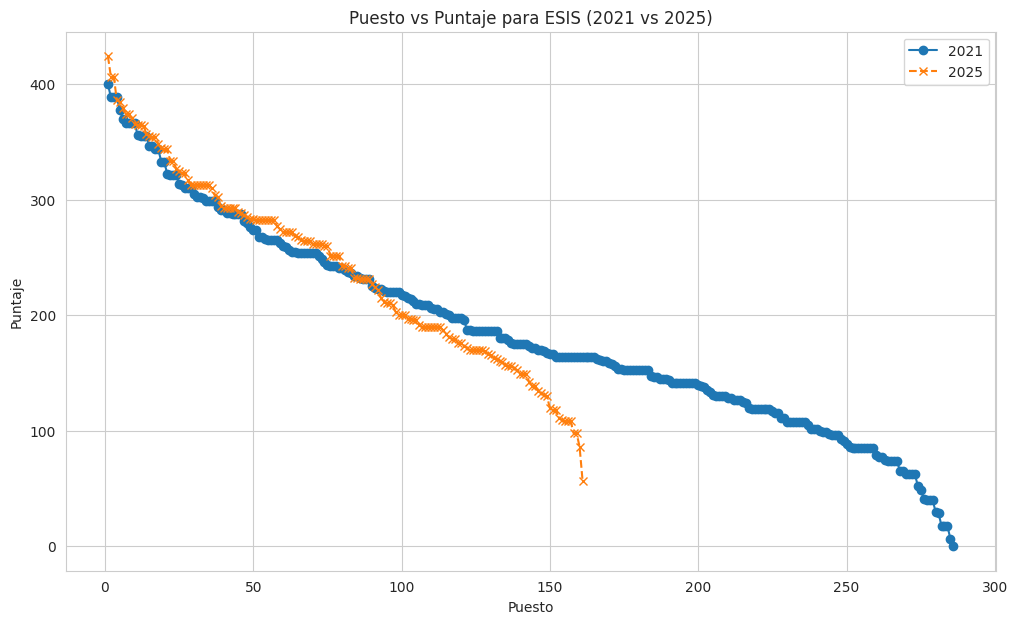

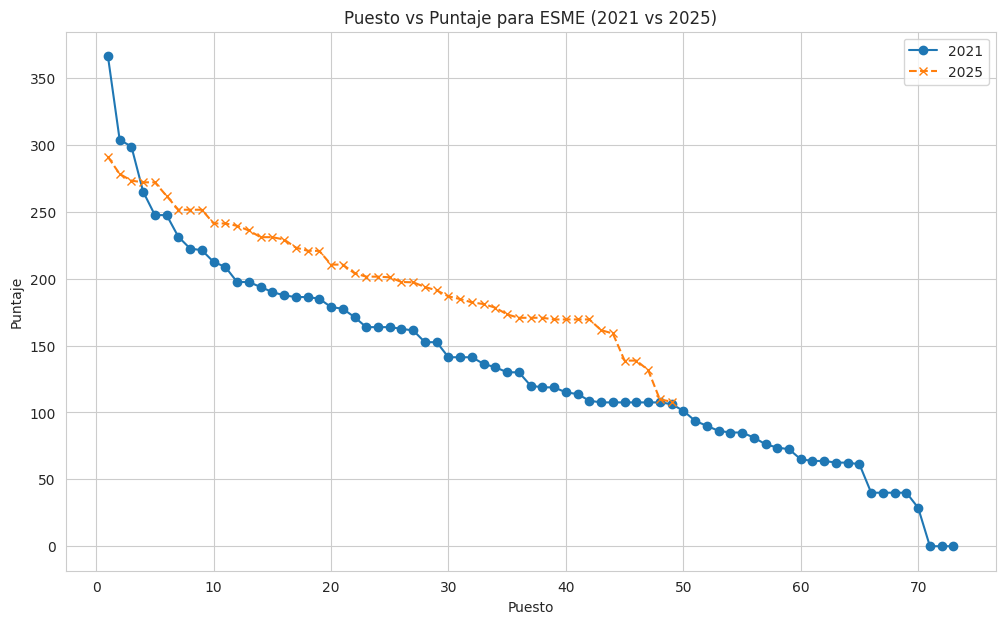

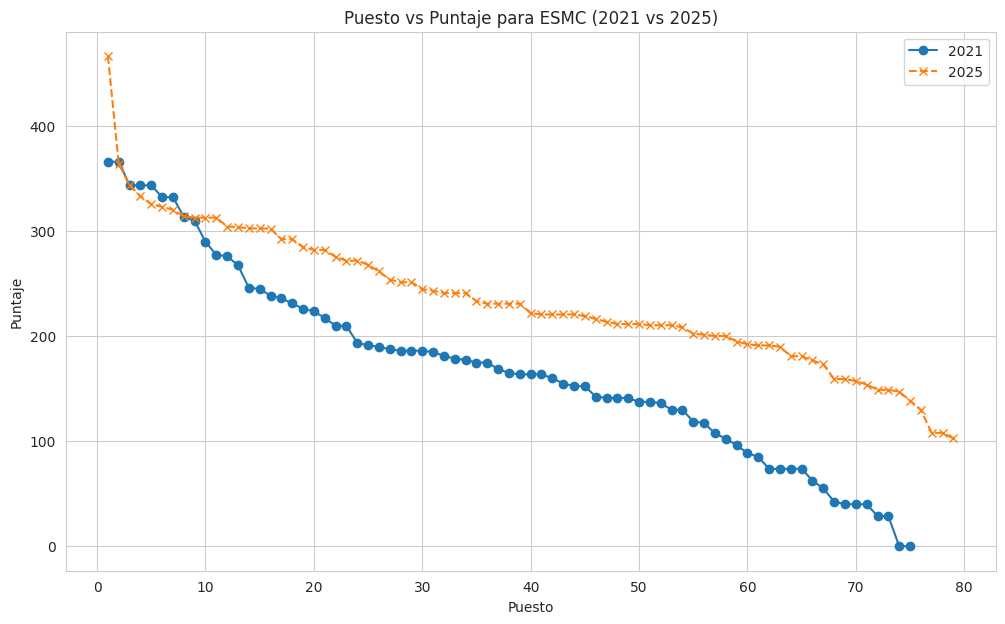

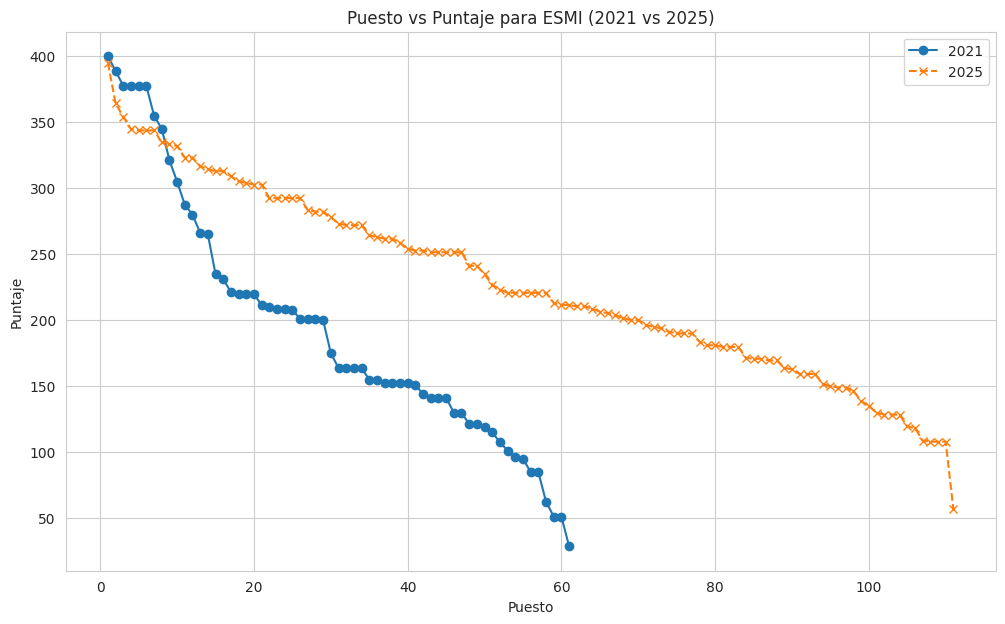

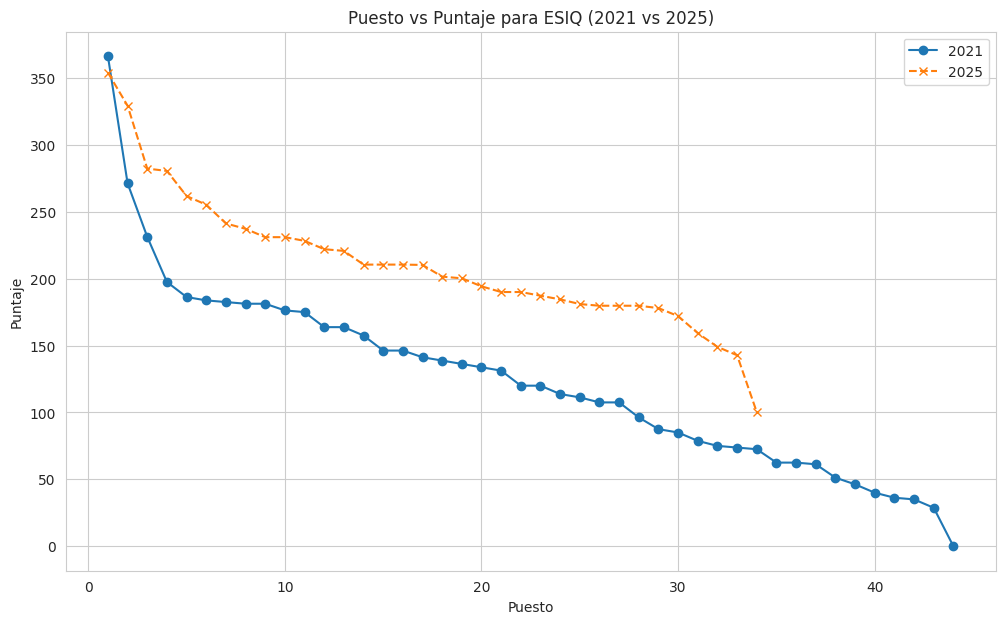

In [ ]:
carreras = ['ESIS', 'ESME', 'ESMC', 'ESMI', 'ESIQ']

for carrera in carreras:
    # Asegurar que las columnas sean numéricas
    df_21['Puesto'] = pd.to_numeric(df_21['Puesto'], errors='coerce')
    df_21[carrera] = pd.to_numeric(df_21[carrera], errors='coerce')
    df_25['Puesto'] = pd.to_numeric(df_25['Puesto'], errors='coerce')
    df_25[carrera] = pd.to_numeric(df_25[carrera], errors='coerce')
    # Eliminar filas con valores nulos para el gráfico
    df_21_carrera = df_21[['Puesto', carrera]].dropna()
    df_25_carrera = df_25[['Puesto', carrera]].dropna()

    plt.figure(figsize=(12, 7))

    # Graficar datos de 2021
    if not df_21_carrera.empty:
        plt.plot(df_21_carrera['Puesto'], df_21_carrera[carrera], marker='o', linestyle='-', label='2021')
    else:
        print(f"No hay datos válidos para 2021 para la carrera {carrera}.")
    # Graficar datos de 2025
    if not df_25_carrera.empty:
        plt.plot(df_25_carrera['Puesto'], df_25_carrera[carrera], marker='x', linestyle='--', label='2025')
    else:
        print(f"No hay datos válidos para 2025 para la carrera {carrera}.")

    plt.title(f'Puesto vs Puntaje para {carrera} (2021 vs 2025)')
    plt.xlabel('Puesto')
    plt.ylabel('Puntaje')
    plt.grid(True)
    plt.legend() # Mostrar la leyenda
    plt.show()

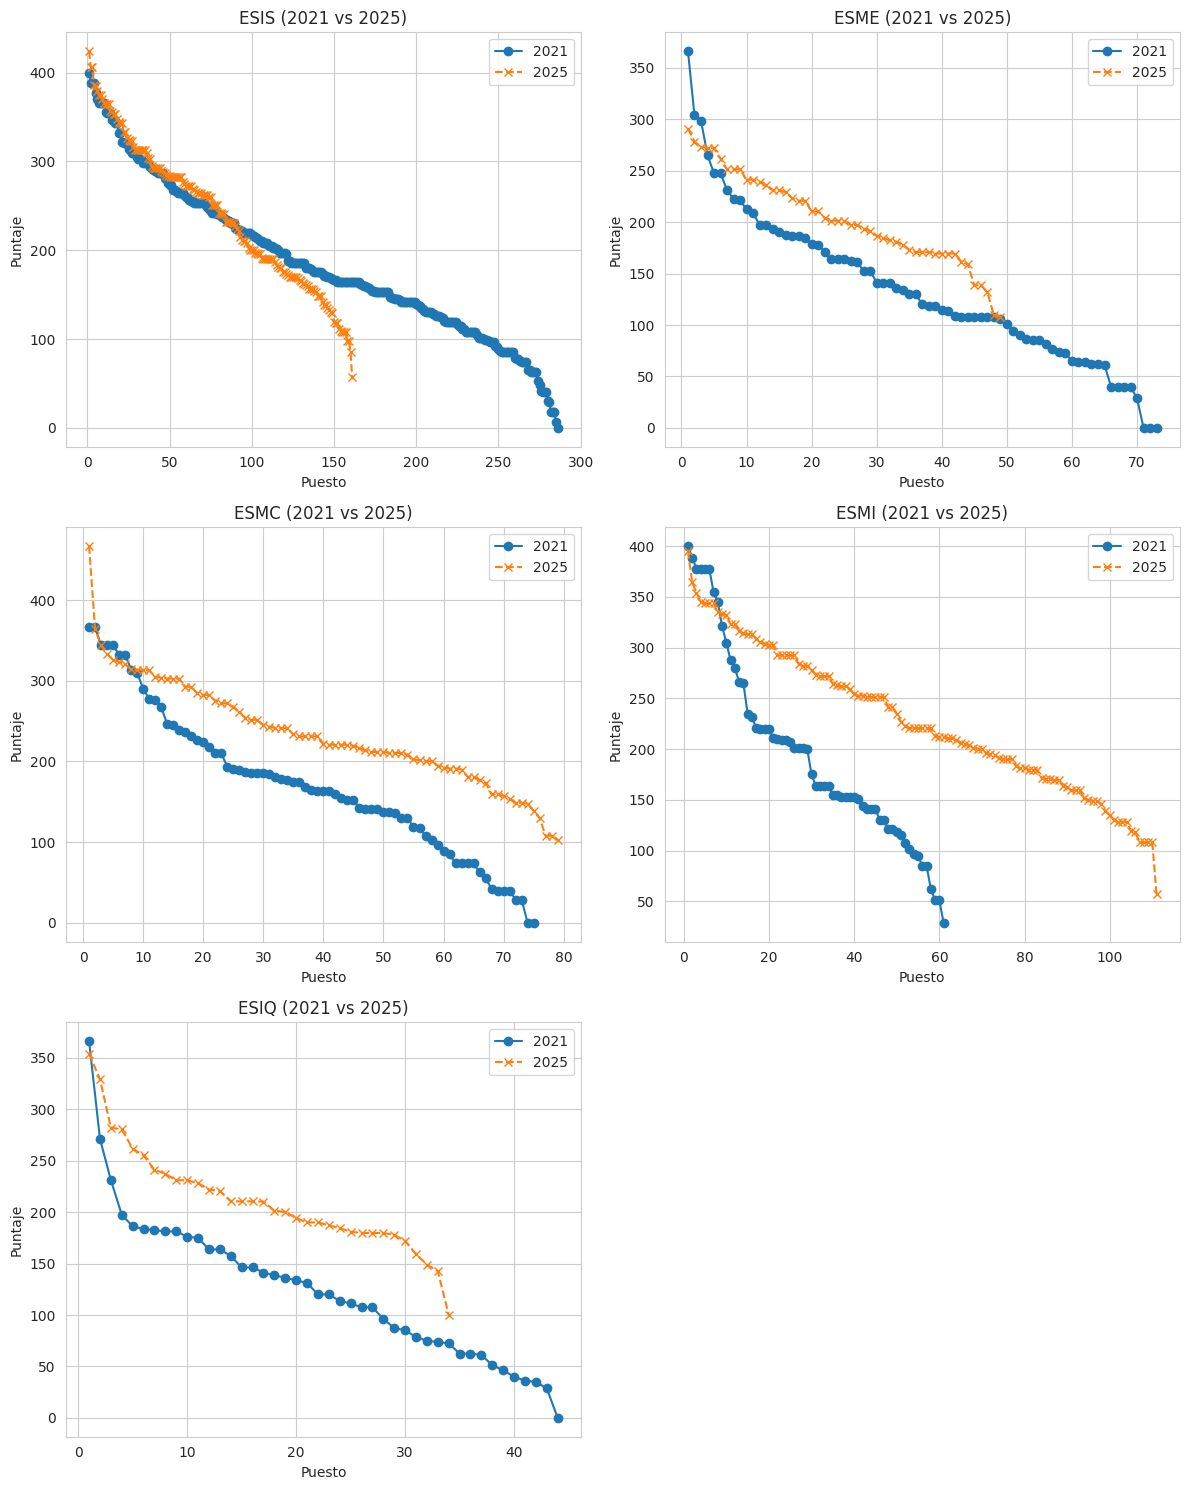

In [ ]:
carreras = ['ESIS', 'ESME', 'ESMC', 'ESMI', 'ESIQ']
# Configurar el número de filas y columnas para los subplots
n_carreras = len(carreras)
ncols = 2
nrows = (n_carreras + ncols - 1) // ncols
plt.figure(figsize=(ncols * 6, nrows * 5)) # Ajustar el tamaño general de la figura

for i, carrera in enumerate(carreras):
    # Agregar un subplot
    plt.subplot(nrows, ncols, i + 1)
    # Asegurar que las columnas sean numéricas
    df_21['Puesto'] = pd.to_numeric(df_21['Puesto'], errors='coerce')
    df_21[carrera] = pd.to_numeric(df_21[carrera], errors='coerce')
    df_25['Puesto'] = pd.to_numeric(df_25['Puesto'], errors='coerce')
    df_25[carrera] = pd.to_numeric(df_25[carrera], errors='coerce')
    # Eliminar filas con valores nulos para el gráfico
    df_21_carrera = df_21[['Puesto', carrera]].dropna()
    df_25_carrera = df_25[['Puesto', carrera]].dropna()

    # Graficar datos de 2021
    if not df_21_carrera.empty:
        plt.plot(df_21_carrera['Puesto'], df_21_carrera[carrera], marker='o', linestyle='-', label='2021')
    else:
        print(f"No hay datos válidos para 2021 para la carrera {carrera}.")
    # Graficar datos de 2025
    if not df_25_carrera.empty:
        plt.plot(df_25_carrera['Puesto'], df_25_carrera[carrera], marker='x', linestyle='--', label='2025')
    else:
        print(f"No hay datos válidos para 2025 para la carrera {carrera}.")

    plt.title(f'{carrera} (2021 vs 2025)') # Título específico para el subplot
    plt.xlabel('Puesto')
    plt.ylabel('Puntaje')
    plt.grid(True)
    plt.legend() # Mostrar la leyenda para cada subplot

plt.tight_layout() # Ajustar los subplots para que no se superpongan
plt.show()
